# 2_Libreria WFDB: Espectro en frecuencia

La Transformada Discreta de Fourier (DFT) ....

En este ejemplo del uso de la librería WFDB se realizara la DFT de la señal mediante el algoritmo FFT de la librería numpy y se realizarn distintas graficas del mismo

In [1]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np

Como primer paso se definen la cantidad de muestras con las que se va a trabajar en este ejemplo y se genera un vector que represente el tiempo para luego poder graficar la señal 

In [2]:
n = 60000
t = np.arange( 0, n, 1 )

La lectura de la señal se lleva a cabo como se mostró el ejemplo anterior, en este caso analizaremos el registro 105

In [26]:
signal, fields = wfdb.io.rdsamp('105', pb_dir='mitdb',   sampto = n)

Para poder graficar posteriormente el espectro de la señal se debe genera un vector que contenga el rango de frecuencias y cuyos elementos estén distanciados por la resolución frecuencial. 
Como el espectro es simétrico se trabajara solo con la mitad del mismo

In [27]:
resf = fields.get( 'fs' )/n
rangof = np.arange( 0, 360 , resf)

Y = np.fft.fft( signal[:,0] )

rangof = rangof[range(n//2)]
Y = Y[range(n//2)]                       

La DFT es una secuencia de numero complejos, por lo tanto es posible graficar su modulo (normalizado o no), fase, su parte real y su parte imaginaria, como se muestra en los siguientes bloques.

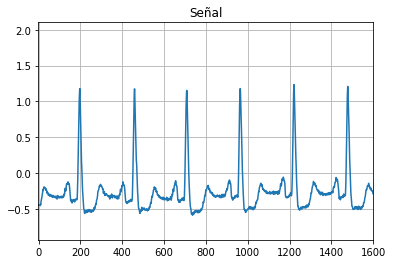

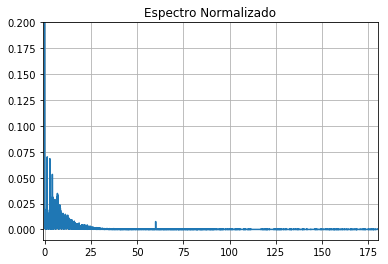

In [32]:
plt.plot( t, signal[:,0] )
plt.title( 'Señal' )
plt.grid( True )
plt.xlim( -1, 1600 )

plt.show()

plt.plot( rangof, abs(Y)/(n//2) )
plt.title( 'Espectro Normalizado' )
plt.grid(True)
plt.xlim( -1, 180 )
plt.ylim( -0.01, 0.2)

plt.show()  

Grafica de la parte real y la parte imaginaria del espectro

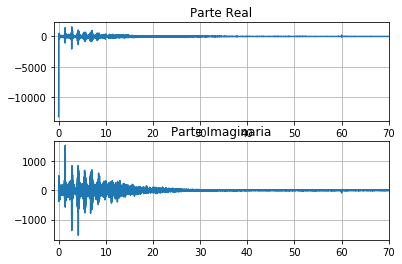

In [29]:
plt.figure(2)

plt.subplot(211)
plt.plot( rangof, Y.real )
plt.title( 'Parte Real' )
plt.grid(True)
plt.xlim( -1, 70 )

plt.subplot(212)
plt.plot( rangof, Y.imag )           
plt.title( 'Parte Imaginaria' )
plt.grid(True)
plt.xlim( -1, 70 )

plt.show()

Grafico del moulo y la fase

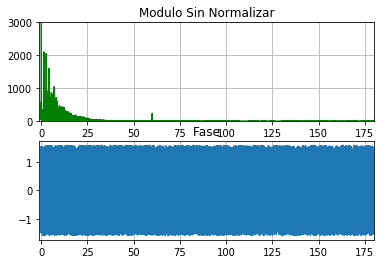

In [30]:
plt.figure(3)

plt.subplot(211)
plt.plot( rangof, abs(Y), 'g' )               
plt.title( 'Modulo Sin Normalizar' )
plt.grid(True)
plt.xlim( -1, 180 )
plt.ylim( -0.2, 3000)

plt.subplot(212)
plt.plot( rangof, np.arctan(Y.imag/Y.real) )
plt.title( 'Fase' )
plt.grid(True)
plt.xlim( -1, 180 )

plt.show()

De estas graficas podemos ver como la potencia de la señal se encuentra principalmente contenida en frecuencias bajas, menores a 30Hz. Además se puede notar un pico en los 60Hz, esto se debe al ruido de linea introducido al digitalizar los registros 

Si se realiza otra grafica como por ejemplo la de la señal 117, se puede notar que este pico se encuentra en los 30Hz, esto se debe a que algunos registros fueron digitalizados a dos veces el tiempo real